## Data Preparation

In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
tr_X = torch.from_numpy(np.loadtxt('train_data.txt', skiprows = 1).astype(np.float32))
tr_y = torch.from_numpy(np.loadtxt('train_truth.txt', skiprows = 1).astype(np.float32))
te_X = torch.from_numpy(np.loadtxt('test_data.txt', skiprows = 1).astype(np.float32))
tr_y = tr_y.view(tr_y.shape[0], 1) # reshape the shape of tr_y

n_samples, n_features = tr_X.shape
n_label = 1

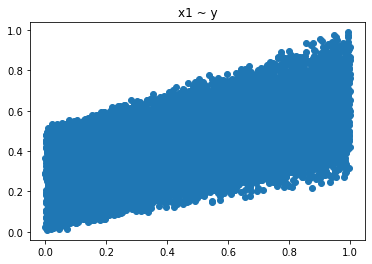

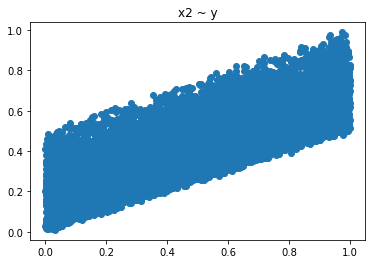

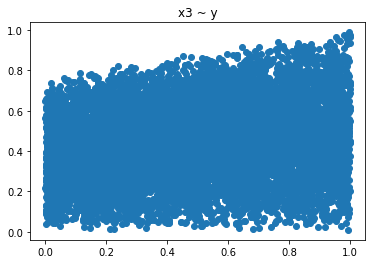

In [3]:
plt.scatter(tr_X[:,0].numpy(), tr_y[:,0].numpy())
plt.title("x1 ~ y")
plt.show()
plt.scatter(tr_X[:,1].numpy(), tr_y[:,0].numpy())
plt.title("x2 ~ y")
plt.show()
plt.scatter(tr_X[:,2].numpy(), tr_y[:,0].numpy())
plt.title("x3 ~ y")
plt.show()

As the scatter plot shows, x1 & x2 has a seemingly linear positive relationship with output y. There is potential nonlinear relationship between x3 and y.

## Model A: Linear Regression
This model has a "y = x" as its activation function. As we have shown in Question 2, under this setting the MLP is just simply a Linear Regression model. We use it as our benchmark.

In [4]:
"""
(1) Model Construction
"""
class LinearRgression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearRgression, self).__init__()
        self.h1 = nn.Linear(input_size, hidden_size[0])
        self.h2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.out_layer = nn.Linear(hidden_size[1], output_size)
        
    def forward(self,x):
        out = self.h1(x)        # x -> h1
        out = self.h2(out)      # h1 -> h2
        y = self.out_layer(out) # h2 -> y 
        return y
    
hidden_cfg = [4, 4]  # 4x4 hidden layers

ModelA = LinearRgression(n_features, hidden_cfg, n_label)

In [5]:
"""
(2) Loss and Optimizer
"""
learning_rate_A = 0.01
criterion_A = nn.MSELoss()
optimizer_A = torch.optim.SGD(ModelA.parameters(),lr = learning_rate_A)

In [7]:
"""
(3) Traning loop
"""
num_epochs = 100

for epoch in range(num_epochs):
    
    # forward path
    y_predicted = ModelA(tr_X)
    loss_A = criterion_A(y_predicted, tr_y)
    
    # backward path
    loss_A.backward()
    
    # update
    optimizer_A.step()
    
    optimizer_A.zero_grad()
    
    if (epoch+1)% 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss_A.item():.4f}')
        

epoch: 10, loss = 0.0428
epoch: 20, loss = 0.0292
epoch: 30, loss = 0.0250
epoch: 40, loss = 0.0237
epoch: 50, loss = 0.0231
epoch: 60, loss = 0.0227
epoch: 70, loss = 0.0225
epoch: 80, loss = 0.0222
epoch: 90, loss = 0.0220
epoch: 100, loss = 0.0217


In [8]:
"""
(4) Model testing 
"""
with torch.no_grad():
    pred_y = ModelA(te_X)
    
np.savetxt('ModelA_test predicted.txt', pred_y)

## Model B: Non-Linear Regression
We introduce ReLU activation function into the previous linear model, enlarging the approximation capacity of our model.

In [9]:
"""
(1) Model Construction
"""
class NLRgression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NLRgression, self).__init__()
        self.relu = nn.ReLU()
        self.l1 = nn.Linear(input_size, hidden_size[0])
        self.l2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.out_layer = nn.Linear(hidden_size[1], output_size)
        
    def forward(self,x):
        out = self.l1(x)        # x -> l1
        out = self.relu(out)    # l1 -> h1
        out = self.l2(out)      # h1 -> l2
        out = self.relu(out)    # l2 -> h2
        y = self.out_layer(out) # h2 -> y 
        return y
    
hidden_cfg = [4, 4]  # 4x4 hidden layers

ModelB = NLRgression(n_features, hidden_cfg, n_label)

In [10]:
"""
(2) Loss and Optimizer
"""
learning_rate_B = 0.01
criterion_B = nn.MSELoss()
optimizer_B = torch.optim.SGD(ModelB.parameters(),lr = learning_rate_B)

In [11]:
"""
(3) Traning loop
"""
num_epochs = 100

for epoch in range(num_epochs):
    
    # forward path
    y_predicted = ModelB(tr_X)
    loss_B = criterion_B(y_predicted, tr_y)
    
    # backward path
    loss_B.backward()
    
    # update
    optimizer_B.step()
    
    optimizer_B.zero_grad()
    
    if (epoch+1)% 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss_B.item():.4f}')

epoch: 10, loss = 0.2448
epoch: 20, loss = 0.1184
epoch: 30, loss = 0.0572
epoch: 40, loss = 0.0304
epoch: 50, loss = 0.0194
epoch: 60, loss = 0.0151
epoch: 70, loss = 0.0134
epoch: 80, loss = 0.0126
epoch: 90, loss = 0.0122
epoch: 100, loss = 0.0120


In [12]:
"""
(4) Model testing 
"""
with torch.no_grad():
    pred_y = ModelB(te_X)
    
np.savetxt('ModelB_test predicted.txt', pred_y)